In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

np.random.seed(sum(map(ord, "distributions")))

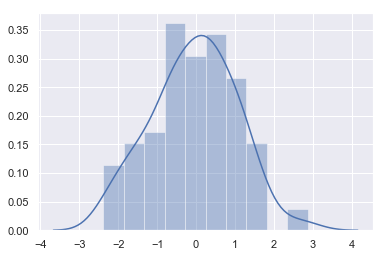

In [11]:
# 单变量分布,绘制一个直方图，并拟合出核密度估计(KDE)。
x = np.random.normal(size=100)
sns.distplot(x,bins=10);

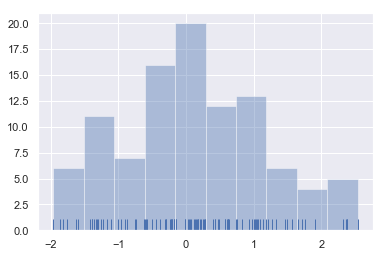

In [10]:
# 我们删除密度曲线并添加了地毯图,bins定义直方图切分的数量
sns.distplot(x, bins=10,kde=False, rug=True);


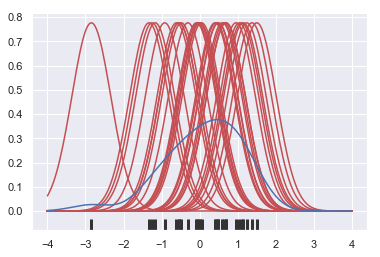

In [23]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")
sns.rugplot(x, color=".2", linewidth=3);


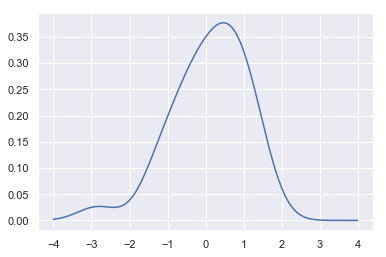

In [24]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

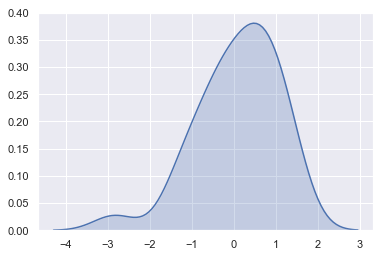

In [27]:
# 以上和这个是一样的
sns.kdeplot(x, shade=True);


In [28]:
# 双变量分布
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

In [32]:
cov

[(1, 0.5), (0.5, 1)]

/Users/camey/anaconda2/envs/fullpy3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


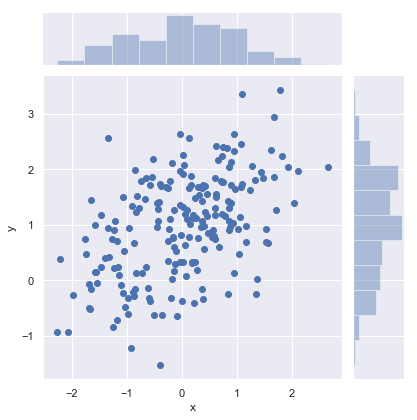

In [30]:
sns.jointplot(x="x", y="y", data=df);


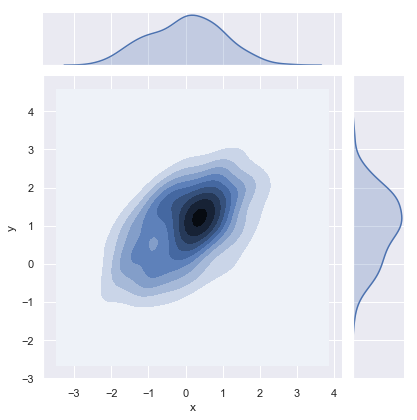

In [33]:
sns.jointplot(x="x", y="y", data=df, kind="kde");


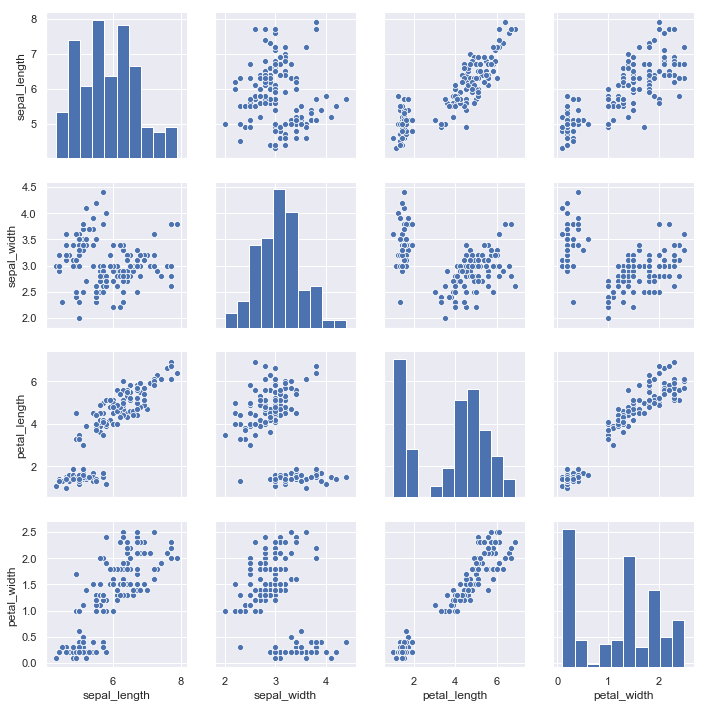

In [34]:
#呈现数据集中成对的关系
iris = sns.load_dataset("iris")
sns.pairplot(iris);